# Machine Learning Basics
In this module, you'll be implementing a simple Linear Regressor and Logistic Regressor. You will be using the Salary Data for the tasks in this module. <br> <br>
**Pipeline:**
* Acquiring the data - done
* Handling files and formats - done
* Data Analysis - done
* Prediction
* Analysing results

## Imports
You may require NumPy, pandas, matplotlib and scikit-learn for this module. Do not, however, use the inbuilt Linear and Logistic Regressors from scikit-learn.

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean
from sklearn.model_selection import train_test_split
from numpy.random import rand
import statistics

## Dataset
You can load the dataset and perform any dataset related operations here. Split the data into training and testing sets. Do this separately for the regression and classification problems.

In [132]:
df = pd.read_csv("Data/SalaryData.csv")
x = df.iloc[:, 1]
y = df.iloc[:, 2]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 1/3, random_state = 0)

## Task 1a - Linear Regressor
Code your own Linear Regressor here, and fit it to your training data. You will be predicting salary based on years of experience.

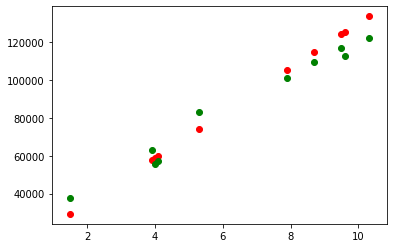

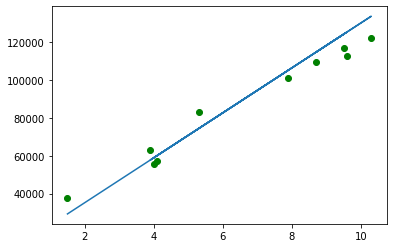

In [133]:
w = rand(1)
b = rand(1)
lr = 0.01 #learning_rate
x_traintemp = x_train.values
y_traintemp = y_train.values
for k in range(5000):
    y_d = 0.0
    x_d = 0.0
    y_pred = [w*i + b for i in x_traintemp]
    y_pred = np.array(y_pred)
    for i in range(len(y_pred)):
        y_d+=(y_pred[i]-y_traintemp[i])*x_traintemp[i]/len(y_pred) 
    y_d = y_d
    for i in range(len(y_pred)):
        x_d+=(y_pred[i]-y_traintemp[i])/len(y_pred)
    x_d = x_d/len(y_pred)
    w = w + lr*(y_d*-1)
    b = b + lr*(x_d*-1)
y_predout = [w*i+b for i in x_test]
plt.scatter(x_test, y_predout, color = "red")
plt.scatter(x_test, y_test, color = "green")
plt.show()
plt.scatter(x_test, y_test, color = "green")
plt.plot(x_test, w*x_test+b)
plt.show()

## Task 1b - Logistic Regression
Code your own Logistic Regressor here, and fit it to your training data. You will first have to create a column, 'Salary<60000', which contains '1' if salary is less than 60000 and '0' otherwise. This is your target variable, which you will aim to predict based on years of experience.

In [92]:
def sigmoid(i):
    return 1/(1+np.exp(-i))

[-1.52980137] [5.554877]


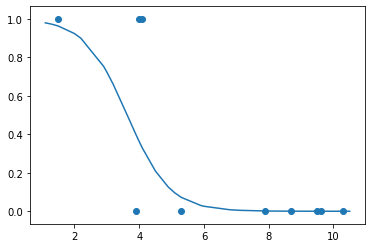

In [93]:
df['Salary<60000'] = [1 if x<60000 else 0 for x in df['Salary']]
x_t = df.iloc[:, 3]
x_traintemp = x_train.values
y_traintemp = y_train.values
train_log = []
test_log = []
lr = 0.05
for i in x_train.index:
    train_log.append(x_t[i])
for i in x_test.index:
    test_log.append(x_t[i])
train_log = pd.Series(train_log)
test_log = pd.Series(test_log)
m = rand(1)
c = rand(1)
for i in range(5000):
    y_d = 0.0
    x_d = 0.0
    y_predtemp = [m*i+c for i in x_traintemp]
    y_pred = list(map(sigmoid, y_predtemp))
    for j in range(len(y_pred)):
        y_d+=(y_pred[j]-train_log[j])*x_traintemp[j]
    for j in range(len(y_pred)):
        x_d+=(y_pred[j]-train_log[j])
    y_d/=len(y_pred)
    x_d/=len(y_pred)
    m = m + lr*(y_d*-1)
    c = c + lr*(x_d*-1)
print(m, c)
plt.scatter(x_test, test_log)
plt.plot(x, sigmoid(m*x+c))
plt.show()

## Task 2 - Results
Analyse the quality of the ML models you built using metrics such as R2, MAE and RMSE for the Linear Regressor, and Accuracy for the Logistic Regressor. Evaluate their performance on the testing set.

In [130]:
ss_res = 0.0
ss_tot = 0.0
mae = 0.0
rmse = 0.0
for i in x_test.index:
    ss_res+=(y_test[i]-(w*x_test[i]+b))**2
    ss_tot+=(mean(y_test)-(w*x_test[i]+b))**2
    mae+=abs(y_test[i]-(w*x_test[i]+b))
ss_res/=len(y_test)
ss_tot/=len(y_test)
mae/=len(y_test)
rmse = ss_res**0.5
r2 = 1-(ss_res/ss_tot)
print(r2, mae, rmse)

[0.95155382] [6935.9032246] [7634.9250599]


In [118]:
from sklearn.metrics import confusion_matrix
pred = []
for i in x_test:
    if sigmoid(m*i+c)>0.5:
        pred.append(1)
    else:
        pred.append(0)
pred = pd.Series(pred)
tn, fp, fn, tp = confusion_matrix(test_log, pred).ravel()
accuracy = (tp+tn)/(tp+tn+fp+fn)
recall = tp/(tp+fn)
precision = tp/(tp+fp)
f_score = [accuracy, precision]
f1_score = statistics.harmonic_mean(f_score)

0.8888888888888888